# Detección de Números Manuscritos con Red Neuronal Profunda
## Dataset MNIST con TensorFlow/Keras

In [1]:
import sys
print(f"Versión de Python: {sys.version}")
print(f"Versión ejecutable: {sys.executable}")

Versión de Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Versión ejecutable: /usr/bin/python3


In [2]:
import tensorflow as tf

# Mostrar información de GPU
print("=" * 60)
print("CONFIGURACIÓN DE GPU NVIDIA")
print("=" * 60)
print(f"\nGPUs disponibles: {len(tf.config.list_physical_devices('GPU'))}")
print(f"CPUs disponibles: {len(tf.config.list_physical_devices('CPU'))}")

# Detalles de GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("\nDetalles de GPUs:")
    for gpu in gpus:
        print(f"  - {gpu}")
else:
    print("\nNo se detectaron GPUs NVIDIA")

# Información compilada de TensorFlow
print(f"\nVersión TensorFlow: {tf.__version__}")
print(f"GPU soportada por compilación: {tf.test.is_built_with_cuda()}")

# Información más detallada
try:
    from tensorflow.python.client import device_lib
    local_device_protos = device_lib.list_local_devices()
    print("\nDispositivos detectados:")
    for device in local_device_protos:
        print(f"  - {device.name}: {device.device_type}")
except Exception as e:
    print(f"Error al obtener detalles: {e}")

print("\n" + "=" * 60)

CONFIGURACIÓN DE GPU NVIDIA

GPUs disponibles: 1
CPUs disponibles: 1

Detalles de GPUs:
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

Versión TensorFlow: 2.19.0
GPU soportada por compilación: True

Dispositivos detectados:
  - /device:CPU:0: CPU
  - /device:GPU:0: GPU



In [3]:
# Obtener el API del dataset MNIST
mnist = tf.keras.datasets.mnist

# Cargar el dataset usando el API
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# Mostrar información del dataset
print("Dataset MNIST cargado exitosamente")
print(f"Conjunto de entrenamiento - xtrain: {xtrain.shape}, ytrain: {ytrain.shape}")
print(f"Conjunto de prueba - xtest: {xtest.shape}, ytest: {ytest.shape}")
print(f"Rango de valores de pixeles: [{xtrain.min()}, {xtrain.max()}]")
print(f"Clases (dígitos): {sorted(set(ytrain))}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset MNIST cargado exitosamente
Conjunto de entrenamiento - xtrain: (60000, 28, 28), ytrain: (60000,)
Conjunto de prueba - xtest: (10000, 28, 28), ytest: (10000,)
Rango de valores de pixeles: [0, 255]
Clases (dígitos): [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)]


In [4]:
# Normalizar las imágenes dividiendo entre 255
xtrain_normalized = xtrain / 255.0
xtest_normalized = xtest / 255.0

# Mostrar información sobre la normalización
print("Normalización completada")
print(f"Valores antes de normalizar - min: {xtrain.min()}, max: {xtrain.max()}")
print(f"Valores después de normalizar - min: {xtrain_normalized.min():.4f}, max: {xtrain_normalized.max():.4f}")
print(f"\nSuma de pixels de la primera imagen antes: {xtrain[0].sum()}")
print(f"Suma de pixels de la primera imagen después: {xtrain_normalized[0].sum():.2f}")

Normalización completada
Valores antes de normalizar - min: 0, max: 255
Valores después de normalizar - min: 0.0000, max: 1.0000

Suma de pixels de la primera imagen antes: 27525
Suma de pixels de la primera imagen después: 107.94


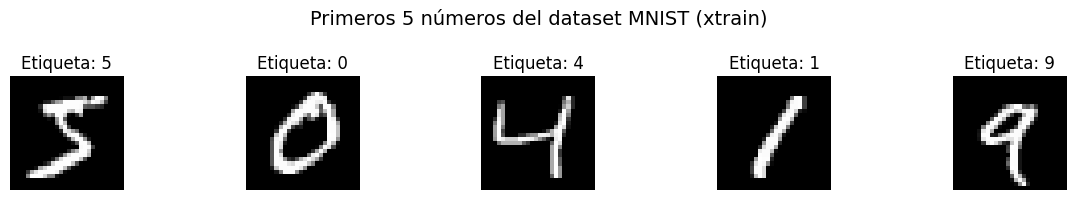

Información de los primeros 5 números:
Imagen 1: Etiqueta = 5, Shape = (28, 28), Suma de píxeles = 27525
Imagen 2: Etiqueta = 0, Shape = (28, 28), Suma de píxeles = 31095
Imagen 3: Etiqueta = 4, Shape = (28, 28), Suma de píxeles = 19443
Imagen 4: Etiqueta = 1, Shape = (28, 28), Suma de píxeles = 17135
Imagen 5: Etiqueta = 9, Shape = (28, 28), Suma de píxeles = 23214


In [5]:
import matplotlib.pyplot as plt

# Mostrar los primeros 5 números de xtrain con sus etiquetas
plt.figure(figsize=(12, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Etiqueta: {ytrain[i]}')
    plt.axis('off')

plt.suptitle('Primeros 5 números del dataset MNIST (xtrain)', fontsize=14)
plt.tight_layout()
plt.show()

# Mostrar información adicional
print("Información de los primeros 5 números:")
for i in range(5):
    print(f"Imagen {i+1}: Etiqueta = {ytrain[i]}, Shape = {xtrain[i].shape}, Suma de píxeles = {xtrain[i].sum()}")

In [6]:
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Aplanar las imágenes normalizadas (28x28 -> 784)
xtrain_flat = xtrain_normalized.reshape(-1, 28*28)
xtest_flat = xtest_normalized.reshape(-1, 28*28)

# Convertir etiquetas a one-hot encoding
ytrain_encoded = to_categorical(ytrain, 10)
ytest_encoded = to_categorical(ytest, 10)

print("Datos preparados para la red neuronal")
print(f"xtrain_flat shape: {xtrain_flat.shape}")
print(f"xtest_flat shape: {xtest_flat.shape}")
print(f"ytrain_encoded shape: {ytrain_encoded.shape}")
print(f"ytest_encoded shape: {ytest_encoded.shape}")

Datos preparados para la red neuronal
xtrain_flat shape: (60000, 784)
xtest_flat shape: (10000, 784)
ytrain_encoded shape: (60000, 10)
ytest_encoded shape: (10000, 10)


In [7]:
# Crear red neuronal
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 neuronas de salida (dígitos 0-9)
])

# Mostrar resumen del modelo
print("Arquitectura del Modelo:")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Arquitectura del Modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compilar modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo compilado exitosamente")

Modelo compilado exitosamente


In [9]:
# Entrenar modelo
print("Iniciando entrenamiento...\n")
history = model.fit(
    xtrain_flat, ytrain_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("\nEntrenamiento completado")

Iniciando entrenamiento...

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7831 - loss: 0.6748 - val_accuracy: 0.9595 - val_loss: 0.1386
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9449 - loss: 0.1865 - val_accuracy: 0.9667 - val_loss: 0.1156
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9558 - loss: 0.1466 - val_accuracy: 0.9702 - val_loss: 0.1017
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9633 - loss: 0.1250 - val_accuracy: 0.9703 - val_loss: 0.1008
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9685 - loss: 0.1055 - val_accuracy: 0.9725 - val_loss: 0.0977
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9712 - loss: 0.0935 - val_accuracy: 0.9732 - val_loss: 0.0953
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0832 - val_accuracy: 0.9733 - val_loss: 0.0925
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accura

In [10]:
# Evaluar en datos de prueba
test_loss, test_accuracy = model.evaluate(xtest_flat, ytest_encoded, verbose=0)
print(f"Pérdida en datos de prueba: {test_loss:.4f}")
print(f"Precisión en datos de prueba: {test_accuracy*100:.2f}%")

Pérdida en datos de prueba: 0.0880
Precisión en datos de prueba: 97.57%


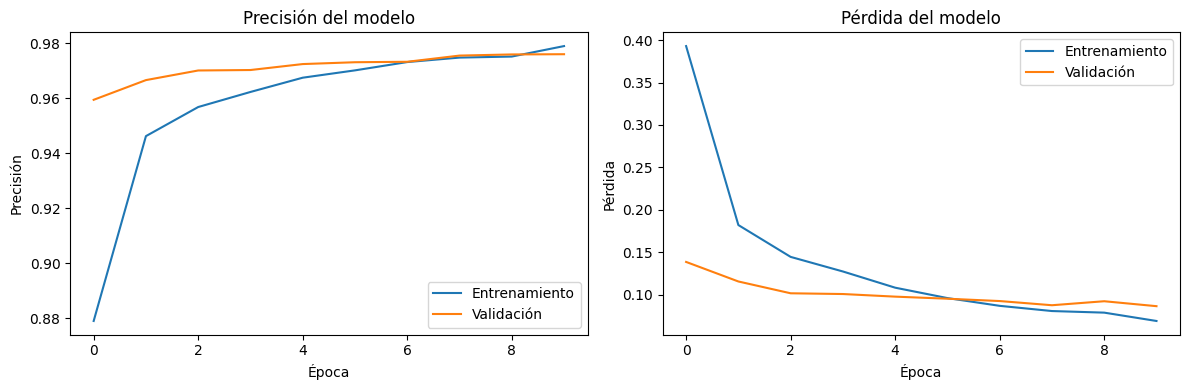

In [11]:
# Visualizar resultados del entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del modelo')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida del modelo')

plt.tight_layout()
plt.show()